# Projet Maths-Info 2

### Préambule

Les équations de Lotka-Volterra, ou “modèle proie-prédateur”, sont couramment
utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un
prédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées
indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s’écrivent de
la manière suivante :

$\dot{x_1} = x_1(\alpha − \beta x_2)$

$\dot{x_2} = − x_2(\gamma − \delta x_1)$

où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement
et $\alpha, \beta, \gamma, \delta$ sont des paramètres strictement positifs.


In [2]:
# Python Standard Library
# -----------------------
pass

In [3]:
# Third-Party Libraries
# ---------------------

# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

In [4]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

In [5]:
# Valeurs des différents coefficients

alpha = 2.0
beta = 1.0
gamma = 2.0
delta = 3.0

In [6]:
# Fonction qui à x associe dx/dt

def f(t,x):
    x1,x2 = x
    fx1= x1*(alpha - beta*x2)
    fx2 = -x2*(gamma - delta*x1)
    return np.array([fx1,fx2])

### Question 1

$\textbf{Q :}$ Donner une interprétation physique à chaque terme de la dynamique.
Montrer qu’il existe deux points d’équilibre (0, 0) et $\overline{x} \in (\mathbb{R}^{+*} \times \mathbb{R}^{+*})$. Que peut-on dire de leur stabilité à ce stade ?

$\textbf{R :}$ Donnons une interprétation physique à chaque terme de la dynamique : 

- $\alpha x_1$ avec $\alpha > 0$ correspond au terme de reproduction des proies, proportionnel au nombre de proies $x_1$ (ie plus il y a de proies, plus il y a de nouveau-nés, et donc plus la population s'accroît). 

- $- \beta x_1 x_2$ avec $\beta > 0$ correspond au terme de décès des proies, proportionnel d'une part au nombre de proies $x_1$ (plus il y a de proies, plus le nombre de décès est important) et d'autre part au nombre de prédateurs $x_2$ (plus il y a de prédateurs, plus les proies se font manger). Le terme est bien négatif car il tend à faire baisser l'accroissement de la population.

- $- \gamma x_2$ avec $\gamma > 0$ correspond au terme de décès des prédateurs, uniquement proportionnel au nombre de prédateurs $x_2$ puisqu'il ne peuvent pas être mangés (plus il y a de prédateurs, plus le nombre de décès est important pour garder la même proportion de décès/population)

- $\delta x_1 x_2$ avec $\delta > 0$ correspond au terme de reproduction des prédateurs, proportionnel d'une part au nombre de prédateurs $x_2$ (plus il y a de prédateurs, plus il y a de nouveaux-nés) et d'autre part au nombre de proies (plus les prédateurs peuvent se nourrir, plus ils se reproduisent)


Les points d'équilibre vérifient $\dot{x_1}(x_1,x_2) = \dot{x_2}(x_1,x_2) = 0$.

En posant, on trouve donc :

$$
 \left \{
    \begin{array}{ll}
        \dot{x_1} = x_1(\alpha − \beta x_2) = 0 \\
        \dot{x_2} = -x_2(\gamma − \delta x_1) = 0
    \end{array}
\right. \;\;\;\;\;\;\; \Leftrightarrow \;\;\;\;\;\;\; 
\left \{
    \begin{array}{ll}
        x_1 = x_2 = 0 \\
        \;\;\;\;\;\;\;\ \mbox{ou} \\
        x_1 = \frac{\gamma}{\delta} \mbox{ et } x_2 = \frac{\alpha}{\beta}
    \end{array}
\right.
$$

$\overline{x}$ vérifie donc $x_1 = \frac{\gamma}{\delta} \mbox{ et } x_2 = \frac{\alpha}{\beta}$.

On ne peut encore rien dire de la stabilité de ces solutions à ce stade.

In [7]:
# définition du point d'équilibre pour les futures fonctions

def point_eq():
    return np.array([gamma/delta, alpha/beta])

### Question 2


$\textbf{Q :}$ A l’aide des fonctions meshgrid et quiver, visualiser graphiquement le champ de vecteurs. Intuiter le comportement des solutions. On pourra aussi utiliser streamplot pour visualiser le portrait de phase.

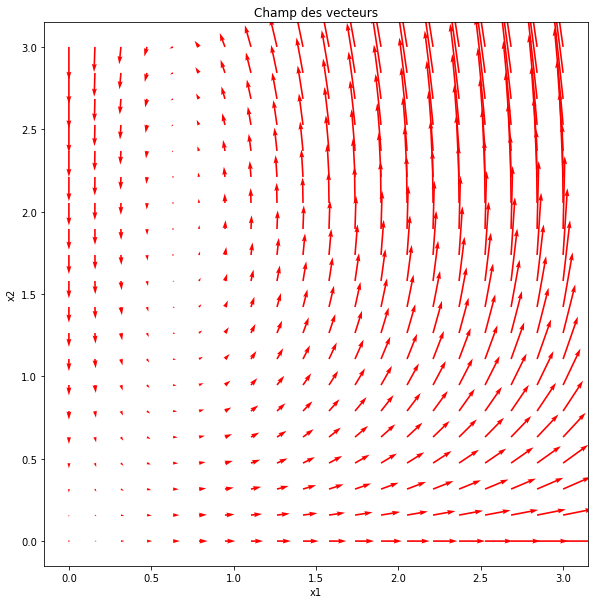

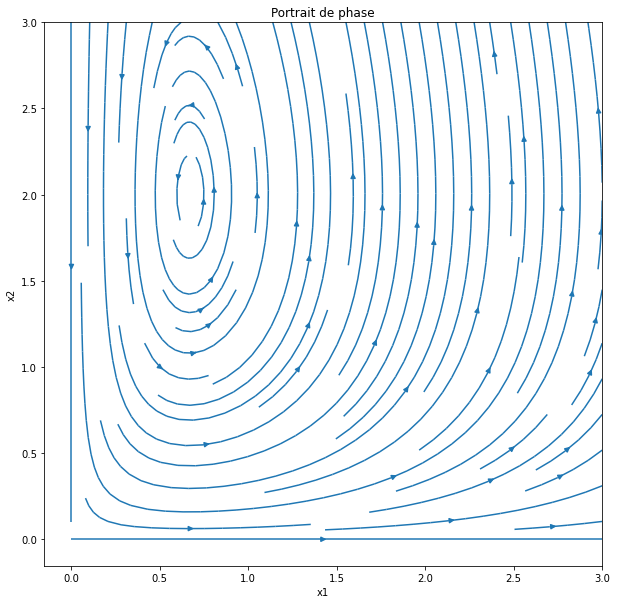

In [10]:
from pylab import meshgrid

x = np.linspace(0, 3, 20)
y = np.linspace(0, 3, 20)
X, Y = meshgrid(x, y)

x_shape = X.shape

U = np.zeros(x_shape)
V = np.zeros(x_shape)

for i in range(x_shape[0]):
    for j in range(x_shape[1]):
        U[i,j] = (X[i,j]*(alpha - beta*Y[i,j]))
        V[i,j] = (- Y[i,j]*(gamma - delta*X[i,j]))
        


fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V, units='xy' ,scale=30, color='red')

ax.set_aspect('equal')

plt.title('Champ des vecteurs',fontsize=12)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

plt.figure()

plt.streamplot(X,Y,U,V)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Portrait de phase', fontsize = 12)
plt.show()


On décide de s'intéresser à la partie supérieure droite du graphe puisque, avec $x_1$ et $x_2$ désignant le nombre (positif) de proies et de prédateurs respectivement, il s'agit du seul espace physiquement possiblement occupé par les solutions.

Au vu des lignes de champ, on peut penser que les solutions sont périodiques dans le temps, c'est à dire que les trajectoires forment des boucle fermées. Elles semblent avoir tendance à "tourner" autour d'un unique point, qu'on peut intuiter comme être un point d'équilibre (stable). D'autre part, les trajectoires initalisées dans $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$ semblent bien rester dans la partie strictement supérieure droite du graphe, c'est-à-dire dans $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$, ce qui est plutôt rassurant, et ce qu'il va s'agir de démontrer ensuite.

### Question 3

$\textbf{Q : }$Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$ reste dans $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$ sur son ensemble de définition.

$\textbf{R :}$ Soit x : I $\rightarrow$ $\mathbb{R}^{2}$ une solution qu'on initialise dans $\mathbb{R}_{>0} \; \times \; \mathbb{R}_{>0}$.

Supposons par l'absurde que cette solution ne soit pas définie dans $\mathbb{R}_{>0} \; \times \; \mathbb{R}_{>0}$ sur tout son ensemble de définition. On a alors : 

$$ \exists \; t_{0} \in I \; tel \; que : \;\;\; x_{1}(t_{0}) = 0 \; ou \; x_{2}(t_{0}) = 0  $$

Soit un tel $t_{0}$.

$\textbf{1er cas :}$ $x_{1}(t_{0}) = 0$

Alors $\dot{x_{1}} (t_{0}) = 0$. À partir du temps $t_{0}$, la valeur de $x_{1}$ est constante égale à 0. 

$$ \forall t \; > \; t_{0}, \; x_{1}(t) = 0 $$

De plus,   $ \forall t \; > \; t_{0}$,    $\dot{x_{2}} = - \gamma x_{2} $

La valeur de $x_{2}$ va donc tendre vers 0 le long de l'axe d'annulation de $x_{1}$ (car $\gamma$ > 0).

 $ \forall t \; > \; t_{0}$, 
 
$$ 
\left\{\begin{matrix}
x_{1}(t) = 0 \\ 
x_{2}(t) = x_{2}(t_{0}) e^{- \gamma (t-t_{0})}
\end{matrix}\right. 
$$

Considérons la fonction y : I $\rightarrow$ $\mathbb{R}^{2}$ : 

$$
\forall t \in I,
\left\{\begin{matrix}
y_{1}(t) = 0\\ 
y_{2}(t) = x_{2}(t_{0})e^{- \gamma (t-t_{0})}
\end{matrix}\right.
$$

y est solution du système d'équations de Lotka-Volterra, tout comme x. De plus, à l'instant t = $t_{0}$, on a $x(t_{0}) = y(t_{0})$. On tient là deux éléments distincts de $S_{f}(t_{0},x(t_{0}))$ (distincts car avant $t_{0}$, x est dans $\mathbb{R}_{>0} \; \times \; \mathbb{R}_{>0}$) . Cependant, le théorème de Cauchy-Lipschitz nous garantit l'unicité d'une solution maximale dans $S_{f}(t_{0},x(t_{0}))$, c'est absurde !

$\textbf{2ème cas :} \; x_{2}(t_{0}) = 0 $

Alors $\dot{x_{2}} (t_{0}) = 0$. À partir du temps $t_{0}$, la valeur de $x_{2}$ est constante égale à 0. 

$$ \forall t \; > \; t_{0}, \; x_{2}(t) = 0 $$

De plus,   $ \forall t \; > \; t_{0}$,    $\dot{x_{1}} = \alpha x_{1} $

La valeur de $x_{1}$ va donc tendre vers + $\infty$ le long de l'axe d'annulation de $x_{2}$ (car $\alpha$ > 0).

 $ \forall t \; > \; t_{0}$, 
 
$$ 
\left\{\begin{matrix}
x_{1}(t) = x_{1}(t_{0}) e^{\alpha (t-t_{0})}\\
x_{2}(t) = 0 
\end{matrix}\right. 
$$

De même que précédemment, on peut construire la fonction y : I $\rightarrow$ $\mathbb{R}^{2}$ :

$$
\forall t \in I,
\left\{\begin{matrix}
y_{1}(t) = x_{1}(t_{0}) e^{\alpha (t-t_{0})}\\ 
y_{2}(t) = 0
\end{matrix}\right.
$$

À nouveau, x et y sont des éléments différents de $S_{f}(t_{0},x(t_{0}))$, or le théorème de Cauchy-Lipschitz nous garantit l'unicité d'une solution maximale dans $S_{f}(t_{0},x(t_{0}))$. C'est absurde.

Finalement, on arrive à une absurdité peu importe le cas de figure. Ainsi, toute solution initialisée dans $\mathbb{R}_{>0} \; \times \; \mathbb{R}_{>0}$ va y rester sur son ensemble de définition 

### Question 4

$\textbf{Q :}$ On considère la fonction $H(x_1, x_2) = \delta x_1 − \gamma ln x_1 + \beta x_2 − \alpha ln x_2$
définie sur $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$. Calculer la dérivée de $H$ le long des solutions
initialisées dans $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$. En déduire que toute solution maximale
initialisée dans $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$ est définie sur $\mathbb{R}$.

$\textbf{R :}$ Nous allons étudier les variations de $H(x_{1}(t), x_{2}(t))$ au fil du temps.

$$\mathit{\begin{align*}
 \forall t \in I, \; H'(x(t)) &= \delta \dot{x_{1}} - \gamma \frac{\dot{x_{1}}}{x_{1}} + \beta \dot{x_{2}} - \alpha \frac{\dot{x_{2}}}{x_{2}}\\ 
 &= \dot{x_{1}}(\delta - \frac{\gamma}{x_{1}}) + \dot{x_{2}}(\beta - \frac{\alpha}{x_{2}}) \\ 
 &= x_{1}(\alpha - \beta x_{2})(\delta - \frac{\gamma}{x_{1}}) - x_{2}(\gamma - \delta x_{1})(\beta - \frac{\alpha}{x_{2}}) \; avec \; les \; équations \; de \; Lotka-Volterra \\ 
 &= 0
\end{align*}}$$

$H$ est donc une quantité qui se conserve dans le temps, $H(x(t))$ ne dépend pas de $t$.

Soit $x$ une solution maximale initialisée dans $\mathbb{R}_{>0} \; \times \; \mathbb{R}_{>0}$. Supposons par l'absurde que cette solution n'est pas définie sur $\mathbb{R}$. Alors par définition du domaine d'existence maximal il existe un instant $t_{lim} \in \mathbb{R}$ tel que $\left \| x(t) \right \| \underset{t \rightarrow t_{lim}}{\rightarrow} + \infty$ ou tel que $d((t,x(t)),\partial(\mathbb{R} \times (\mathbb{R}_{>0} \; \times \; \mathbb{R}_{>0})) \underset{t \rightarrow t_{lim}}{\rightarrow} 0 $.

Soit un tel $t_{lim}$. À l'instant initial $t_{dep}$, on est dans le domaine $\mathbb{R}_{>0} \; \times \; \mathbb{R}_{>0}$, par conséquent on peut calculer $H(x(t_{dep})$. Cette quantité sera conservée dans le temps, on sait que :
$$ \forall t \in I, H(x(t)) = H(x(t_{dep})) \in \mathbb{R}$$



Supposons qu'on soit dans le 1er cas de figure : alors $\left \| x(t) \right \| \underset{t \rightarrow t_{lim}}{\rightarrow} + \infty$. Cependant, cela implique que $H(x(t)) \underset{t \rightarrow t_{lim}}{\rightarrow} + \infty$ par définition de $H$, or c'est impossible car on a vu que $H$ est constant dans le temps.

Supposons maintenant qu'on soit dans le 2ème cas de figure : $d((t,x(t)),\partial(\mathbb{R} \times (\mathbb{R}_{>0} \; \times \; \mathbb{R}_{>0})) \underset{t \rightarrow t_{lim}}{\rightarrow} 0 $.

Concrètement, cela veut dire que $x_{1}(t) \underset{t \rightarrow t_{lim}}{\rightarrow} 0 \;$ et/ou $\; x_{2}(t) \underset{t \rightarrow t_{lim}}{\rightarrow} 0$. Cependant, on aurait alors $H(x(t)) \underset{t \rightarrow t_{lim}}{\rightarrow} - \infty$ par définition de $H$, ce qui est impossible car $H$ est constant dans le temps.

Finalement, on en conclut qu'un tel cas de figure est impossible. Toute solution maximale initialisée dans $\mathbb{R}_{>0} \; \times \; \mathbb{R}_{>0}$ est définie sur $\mathbb{R}$.

### Question 5

$\textbf{Q :}$ Représenter les courbes de niveau de $H$. Où se trouve  $\overline{x}$ ? Qu’en conclut-on
sur le comportement des solutions ? En déduire (graphiquement) que  $\overline{x}$
est stable, au sens de la définition de stabilité.


In [8]:
def H(x1,x2):
    return delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)

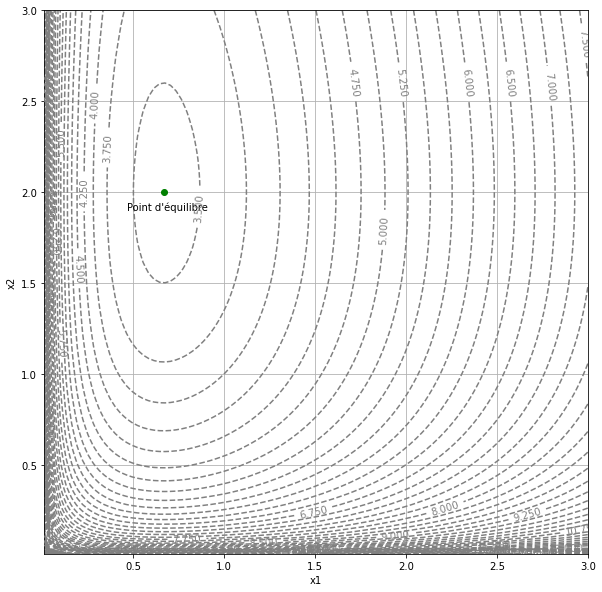

In [69]:
display_contour(
    H, 
    x=np.linspace(0.01, 3.0, 100), 
    y=np.linspace(0.01, 3.0, 100), 
    levels=70 
)

x,y = point_eq()
plt.plot(x,y,'go')
plt.text(x-0.2,y-0.1,"Point d'équilibre")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Les lignes de niveau de H, qui correspondent à différentes trajectoires possibles du système de Lotka-Volterra, sont fermées, ce qui nous permet de valider l'hypothèse de la périodicité temporelle des solutions. 

Graphiquement, on remarque que $\overline{x}$ est un centre de convergence des différentes lignes de niveaux, qui comme on l'avait précédemment intuité "tournent" autour de ce point, et qui se resserrent autour de lui plus on s'en approche. On en déduit bien que $\overline{x}$ est stable : une solution initalisée à une distance $dx$ de $\overline{x}$ n'a pas tendance à fuir $\overline{x}$ comme ce serait le cas pour un point d'équilibre instable, mais reste suffisamment proche du point d'équilibre.

### Question 6

$\textbf{Q :}$ 
Coder une fonction du type 

$def$ solve_euler_explicit$(f,x0,dt,t0,tf):$
    
    ...
    
    return t,x
    
prenant en entrée une fonction $f : \mathbb{R} \times \mathbb{R}^{n} \rightarrow \mathbb{R}^{n}$ quelconque, une condition initiale $x_{0}$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^{j}$ et de la solution $x^{j}$ du schéma d'Euler explicite appliqué à $\dot{x} = f(t,x)$. La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque $dt$ tend vers 0. Comment visualiser graphiquement l'ordre de convergence ?

$\textbf{R :}$ Pour construire la liste des temps $t^{j}$, on va construire une série de temps espacés de $dt$ à partir de $t_{0}$, et ce le plus longtemps possible avant qu'on ne soit trop près de $t_{f}$, et alors on ajoute $t_{f}$ à la liste.

$\mathbf{Schéma \; d'Euler\;  explicite : }$

Pour chaque coordonnée $x_{i}$, avec $i \in \left [ 1,...,n \right ]$, on calcule la valeur en $t_{j+1}$ selon l'approximation :

$$\forall i \in \left [ 1,...,n \right ], \forall j \in \left [ 1,...,N \right ], \; x_{i}(t^{j+1}) = x_{i}(t^{j}) + (t^{j+1} - t^{j})f(t^{j},x_{i}(t^{j})) $$

Ici on fonctionne avec des tableaux vectorisés, donc dans le code on va procéder de la même manière, en faisant directement l'opération sur le vecteur $x$ de taille $n$ :

$$ \forall j \in \left [ 1,...,N \right ], \; x(t^{j+1}) = x(t^{j}) + (t^{j+1} - t^{j})f(t^{j},x(t^{j})) $$

In [10]:
def solve_euler_explicit(f,x0,dt,t0,tf):
    t = [t0]
    
    #construction de la liste des temps comme expliqué précédemment
    while t[-1] < tf - dt:
        t.append(t[-1] + dt)
    t.append(tf)
    
    N = len(t) 
    #On a une liste de N valeurs pour le tableau de temps, ou les N-1 premières sont espacées de dt, et ensuite
    #la dernière est tf
    
    shape = np.shape(x0)[0]
    x = np.zeros((N,shape)) #on crée une matrice de N lignes de shape colonnes (chacune représente un vecteur
                            #de taille shape)
    
    x[0] = x0
    
    for i in range(N-1): # il nous faut une matrice de N vecteurs en tout, et on en a déjà un
        x[i+1] = (x[i] + (t[i+1] - t[i])*f(t[i],x[i])) 
        #ici, on ne peut pas multiplier par le pas dt, car l'écart entre les temps n'est pas tout le temps le même 
        #à la dernière étape il ne vaut pas forcément dt
        
    return np.array(t),x

#### Tests

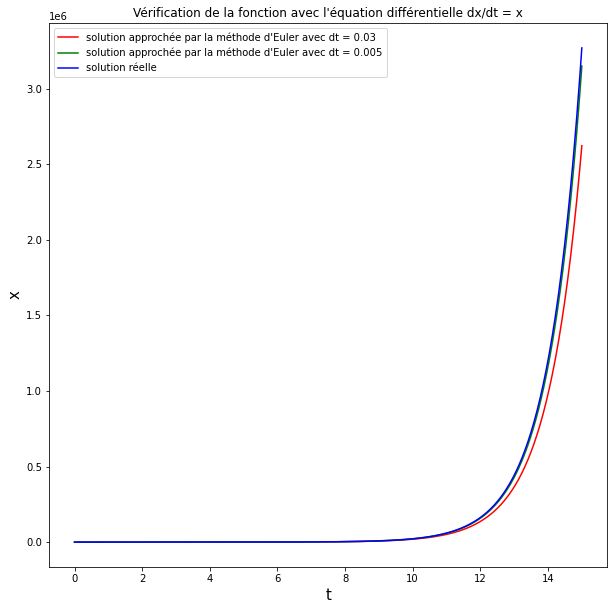

In [27]:
# Test

x0 = np.array([1])
t0 = 0
dt = 0.03
dt2 = 0.005
tf = 15

def fonction(t,x):
    return x



t,x = solve_euler_explicit(fonction,x0,dt,t0,tf)
t2,x2 = solve_euler_explicit(fonction,x0,dt2,t0,tf)
plt.plot(t,x,color = 'red')
plt.plot(t2,x2,color = 'green')
plt.plot(t,np.exp(t), color = 'blue')
legend = [f"solution approchée par la méthode d'Euler avec dt = {dt}",f"solution approchée par la méthode d'Euler avec dt = {dt2}",'solution réelle']
plt.title("Vérification de la fonction avec l'équation différentielle dx/dt = x")
plt.legend(legend)
plt.xlabel('t',size=15)
plt.ylabel('x',size=15)
plt.show()

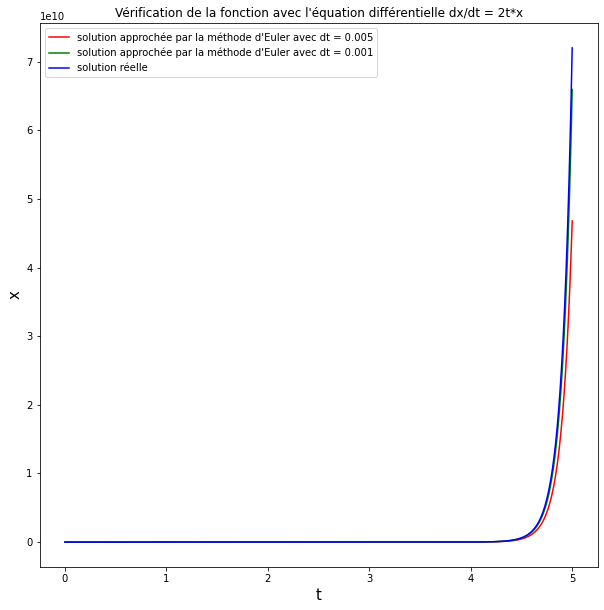

In [29]:
# Test

x0 = np.array([1.])
t0 = 0
dt = 0.005
dt2 = 0.00
tf = 5

def fonction(t,x):
    return 2*t*x

t,x = solve_euler_explicit(fonction,x0,dt,t0,tf)
t2,x2 = solve_euler_explicit(fonction,x0,dt2,t0,tf)
plt.plot(t,x,color = 'red')
plt.plot(t2,x2,color = 'green')
plt.plot(t,np.exp(t**2), color = 'blue')
legend = [f"solution approchée par la méthode d'Euler avec dt = {dt}",f"solution approchée par la méthode d'Euler avec dt = {dt2}",'solution réelle']
plt.title("Vérification de la fonction avec l'équation différentielle dx/dt = 2t*x")
plt.legend(legend)
plt.xlabel('t',size=15)
plt.ylabel('x',size=15)
plt.show()

On voit bien que la méthode converge lorsque dt tend vers $0$ : la courbe réelle (en bleu) et celle approchée (en vert) se superposent presque lorsqu'on réduit le pas.

Pour visualiser graphiquement l'ordre de convergence, il faudrait pouvoir tracer $\frac{\underset{1 \le j\le N}{\text{max}} \|x^{j} - x(t_j) \|}{dt^p}$ en fonction de $dt$, pour un grand nombre de valeurs de $dt$ et pour différentes valeurs de p, et de trouver ainsi à tâton le plus petit p tel que ce quotient est borné.

Il s'agit cependant d'une méthode fastidieuse, longue et relativement peu efficace.

### Question 7

$\textbf{Q :}$ Utiliser le schéma d’Euler explicite pour simuler les équations de Lotka Volterra. Que constate-t-on en temps long ? Cette résolution vous semble t-elle fidèle à la réalité ? On pourra tracer l’évolution de la fonction $H$.

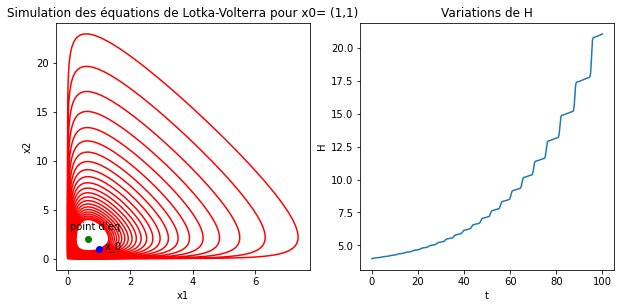

In [61]:
x0 = np.array([1.,1.])
t0 = 0
dt = 0.01
tf = 100

t,x = solve_euler_explicit(f,x0,dt,t0,tf)
x1 = x[:,0]
x2 = x[:,1]

y1,y2 = point_eq()

ax1 = plt.subplot(221)
ax1.plot(x1,x2,color = 'red')
ax1.plot(1.,1.,'bo')
ax1.text(1.2,1,'x_0')
ax1.plot(y1,y2,'go')
ax1.text(y1-0.6,y2+1,"point d'eq")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Simulation des équations de Lotka-Volterra pour x0= (1,1)")
ax2 = plt.subplot(222)
ax2.plot(t,H(x1,x2))
plt.xlabel('t')
plt.ylabel('H')
plt.title("Variations de H")
plt.show()

On observe qu'en temps long, la simulation s'éloigne beaucoup de la solution réelle, d'une part grâce au tracé de la simulation en elle-même, dont la sorte de ligne de niveau diverge de plus en plus (quand elle devrait former une unique boucle puisque les lignes de niveaux de H sont fermées) et qui "tourne" autour du point $\overline{x}$, et d'autre part grâce à l'évolution de la fonction $H$ qui au lieu de rester constante croît de plus en plus, montrant bien la divergence en temps long, qui n'est pas représentative de la réalité.

### Question 8

$\textbf{Q :}$ Coder maintenant une fonction du type 

$def$ solve_euler_implicit$(f,x0,dt,t0,tf,itermax = 100):$

    ...
    
    return t,x
    
donnant la solution d'un schéma d'Euler implicite appliqué à $\dot{x} = f(t,x)$ selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois sur les équations de Lotka-Volterra ?

$\textbf{R :}$ On construit la liste des temps $t^{j}$ de la même manière que précédemment, à la question 6. 

$\mathbf{Schéma \; d'Euler \; implicite :}$

Pour chaque coordonée $x_{i}$, avec $i \in \left [ 1,...,n \right ]$, on calcule la valeur en $t_{j+1}$ selon l'approximation :

$$\forall i \in \left [ 1,...,n \right ], \forall j \in \left [ 1,...,N \right ], \; x_{i}(t^{j+1}) = x_{i}(t^{j}) + (t^{j+1} - t^{j})f(t^{j+1},x_{i}(t^{j+1})) $$

On voit ici qu'on utilise l'évaluation de $f$ en $(t^{j+1},x_{i}(t^{j+1}))$ pour calculer la valeur de $x_{i}(t^{j+1})$, on parle alors de définition $\textbf{implicite}$.

De la même manière que précédemment, on raisonne ici avec des tableaux vectorisés, on aura donc :

$$ \forall j \in \left [ 1,...,N \right ], \; x(t^{j+1}) = x(t^{j}) + (t^{j+1} - t^{j})f(t^{j+1},x(t^{j+1})) $$

Il faut donc être en mesure de résoudre cette équation pour savoir quelle valeur donner à $x(t^{j+1})$. On réutilise la fonction Newton du 1er projet, qu'on modifie un petit peu car on travaille ici en dimension $n$.

In [14]:
def J(f):
    j = autograd.jacobian
    def J_f(x):
        return j(f)(x)
    return J_f

def Newton(F, x0, eps=10e-5, N=100):
    Jfonct = J(F)
    for i in range(N):
        J_F = Jfonct(x0)
        inv_J_F = np.linalg.inv(J_F)

        x = x0 - np.dot(inv_J_F,F(x0))
        
        if np.linalg.norm(x-x0) <= eps:
            return x
        x0 = x
    else:
        raise ValueError(f"no convergence in {N} steps.")

In [15]:
def solve_euler_implicit(f,x0,dt,t0,tf,itermax = 100,eps=10e-20):
    t = [t0]
    while t[-1] < tf - dt:
        t.append(t[-1] + dt)
        
    t.append(tf)
    N = len(t)
        
    shape = np.shape(x0)[0]
    x = np.zeros((N,shape))
    x[0] = x0
    
    for i in range(N-1): 
        var0 = (x[i] + (t[i+1] - t[i])*f(t[i],x[i]))
        k = 0 #k nous sert à compter le nombre d'itérations (qui doit être inférieur à itermax)
        vark = var0
        while k < itermax :
            vark_1 = x[i] + (t[i+1] - t[i])*f(t[i+1],vark)
            if np.linalg.norm(vark_1-vark)/np.linalg.norm(var0) <= eps:
                #si c'est suffisamment petit, on arrête la boucle while en posant k = itermax
                vark = vark_1
                k = itermax
            else:
                #sinon on continue
                k += 1
                vark = vark_1
        x[i+1] = vark
    
    return t,x


#une autre version de la fonction, en cherchant le point fixe par la méthode de Newton
def solve_euler_implicit_2(f,x0,dt,t0,tf):
    t = [t0]
    while t[-1] < tf - dt:
        t.append(t[-1] + dt)
        
    t.append(tf)
    N = len(t)
        
    shape = np.shape(x0)[0]
    x = np.zeros((N,shape))
    x[0] = x0
    
    for i in range(N-1): # il nous faut une liste de N valeurs en tout, et on en a déjà une
        def phi(var):
            #on définit phi à l'intérieur de la boucle for car cette fonction dépend des valeurs de temps
            #et de x déjà connues
            return x[i] - var + (t[i+1] - t[i])*f(t[i+1],var)
        x[i+1] = (Newton(phi,x[i])) #on fait partir Newton de la dernière valeur connue de x, 
                                    #car on sait qu'on n'est pas loin du prochain point
    return t,x

On a ici $x(t^{j+1})$ défini comme le zéro de la fonction $\phi_{t^{j},t^{j+1},x^{j}} : x \rightarrow x(t^{j}) + (t^{j+1} - t^{j})f(t^{j+1},x) - x$

#### Tests

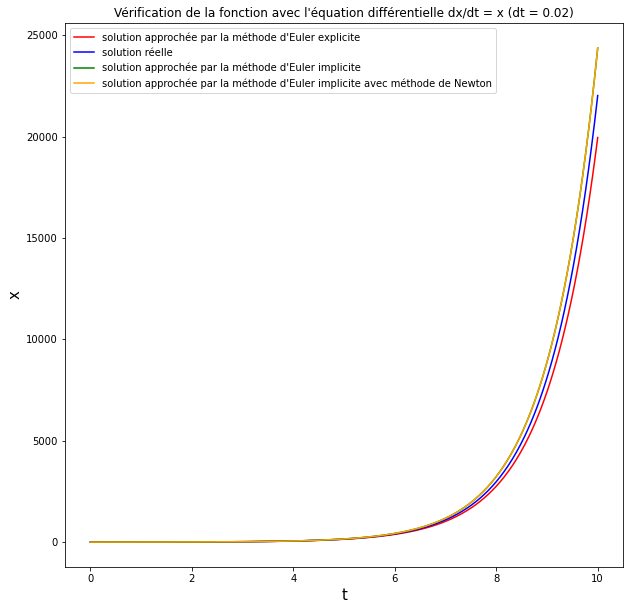

In [16]:
# Test de validité des deux méthodes implicites

x0 = np.array([1.])
t0 = 0
dt = 0.02
tf = 10

def fonction(t,x):
    return x



t,x = solve_euler_explicit(fonction,x0,dt,t0,tf)
t,y = solve_euler_implicit(fonction,x0,dt,t0,tf)
t,z = solve_euler_implicit_2(fonction,x0,dt,t0,tf)
plt.plot(t,x,color = 'red')
plt.plot(t,np.exp(t), color = 'blue')
plt.plot(t,y,color = 'green')
plt.plot(t,z,color='orange')
legend = ["solution approchée par la méthode d'Euler explicite",'solution réelle',"solution approchée par la méthode d'Euler implicite","solution approchée par la méthode d'Euler implicite avec méthode de Newton"]
plt.title(f"Vérification de la fonction avec l'équation différentielle dx/dt = x (dt = {dt})")
plt.legend(legend)
plt.xlabel('t',size=15)
plt.ylabel('x',size=15)
plt.show()

Les deux méthodes implicites se superposent graphiquement ce qui est rassurant. Alors que la méthode explicite avait tendance à sous-estimer la trajectoire, la méthode implicite a tendance à la surestimer.

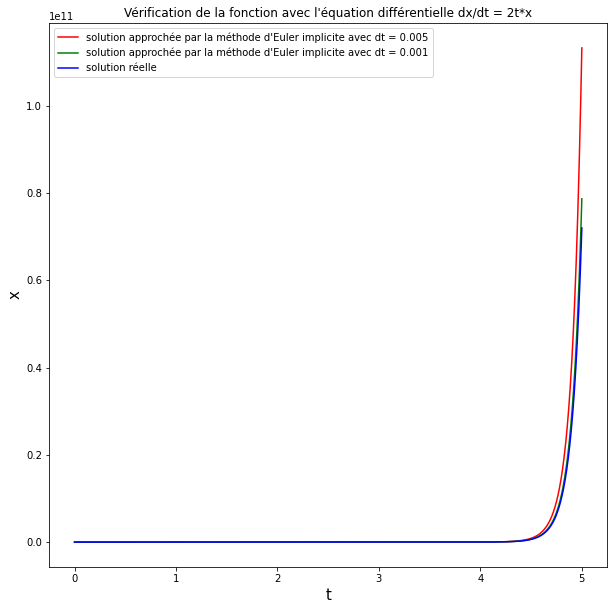

In [35]:
# Test de convergence quand dt tend vers 0

x0 = np.array([1.])
t0 = 0
dt = 0.005
dt2 = 0.001
tf = 5

def fonction(t,x):
    return 2*t*x


t,y = solve_euler_implicit(fonction,x0,dt,t0,tf)
t,x = solve_euler_explicit(fonction,x0,dt,t0,tf)
t2,x = solve_euler_implicit(fonction,x0,dt2,t0,tf)
plt.plot(t,y,color = 'red')
plt.plot(t2,x,color = 'green')
plt.plot(t,np.exp(t**2), color = 'blue')

legend = [f"solution approchée par la méthode d'Euler implicite avec dt = {dt}", f"solution approchée par la méthode d'Euler implicite avec dt = {dt2}",'solution réelle']
plt.title(f"Vérification de la fonction avec l'équation différentielle dx/dt = 2t*x")
plt.legend(legend)
plt.xlabel('t',size=15)
plt.ylabel('x',size=15)
plt.show()

On voit de nouveau bien une convergence de la solution approchée vers la solution réelle quand dt tend vers 0.

#### Test sur les équations de Lotka-Volterra

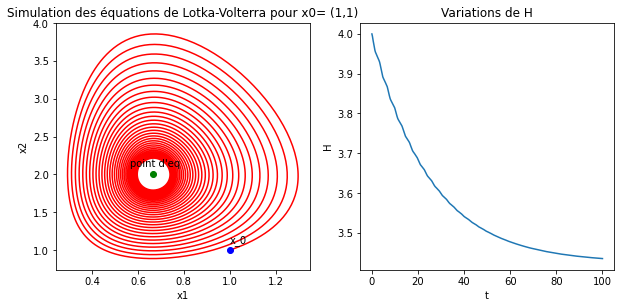

In [56]:
x0 = np.array([1.,1.])
t0 = 0
dt = 0.01
tf = 100

t,x = solve_euler_implicit(f,x0,dt,t0,tf)
x1 = x[:,0]
x2 = x[:,1]

y1,y2 = point_eq()

ax1 = plt.subplot(221)
ax1.plot(x1,x2,color = 'red')
ax1.plot(1.,1.,'bo')
ax1.text(1,1.1,'x_0')
ax1.plot(y1,y2,'go')
ax1.text(y1-0.1,y2+0.1,"point d'eq")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Simulation des équations de Lotka-Volterra pour x0= (1,1)")
ax2 = plt.subplot(222)
ax2.plot(t,H(x1,x2))
plt.xlabel('t')
plt.ylabel('H')
plt.title("Variations de H")
plt.show()

Cette fois-ci H décroit, et la solution approchée tend à converger vers le point d'équilibre $\overline{x}$ plutôt qu'à en diverger comme on avait précédemment vu avec la méthode explicite.

### Question 9

$\textbf{Q :}$ Exprimer pourquoi les solutions de 

$$\begin{matrix}
\dot{x_{1}} = x_{1}(\alpha - \beta x_{2}) - u_{1}(x_{1},x_{2})(H(x_{1},x_{2}) - H_{0}) \\ 
\dot{x_{2}} = - x_{2}(\gamma - \delta x_{1}) - u_{2}(x_{1},x_{2})(H(x_{1},x_{2}) - H_{0}) 
\end{matrix} \;\;\;\;\;\;\; (9) $$ 

sont identiques à celles de Lotka-Volterra si $H_{0} = H(x(0))$ pour tout choix de $u : \mathbb{R}^{2} \rightarrow \mathbb{R}^{2}$ continûment différentiable.

$\textbf{R :}$ Considérons une solution x : I $\rightarrow$ $\mathbb{R}^{2}$ de (9).

On note (LV) le système d'équations de Lotka-Volterra.

À l'instant initial $t = 0$, on a : $(H(x_{1},x_{2}) - H_{0}) = 0$. Par conséquent, le système (9) est identique à celui de (LV). Le système va donc évoluer selon Lotka-Volterra à l'instant initial. Un court instant plus tard, disons à $t = 0 + dt$, le système a évolué, mais $x(t)$ est tel que  $(H(x(t)) - H_{0}) = 0$ à nouveau, car d'après la question 4, ce terme est nul si l'on suit les équations de (LV), ce que l'on a fait entre $t = 0$ et $t = 0 + dt$. Ainsi, ici encore  $(H(x_{1},x_{2}) - H_{0}) = 0$, et le système (9) est identique à celui de Lotka-Volterra. Entre $t = dt$ et $t = 2dt$, le système évolue donc selon Lotka-Volterra à nouveau, et à $t = 2dt$, on a toujours  $(H(x_{1},x_{2}) - H_{0}) = 0$, et ainsi de suite... Finalement, pour tout temps $t$, ce terme  $(H(x_{1},x_{2}) - H_{0})$ est donc nul, et la solution de (9) est donc également une solution du système (LV), puisqu'elle évolue d'une manière régie par Lotka-Volterra à tout temps $t$.

Pour mieux comprendre, faisons une petite analogie : imaginons que $x(t)$ décrit la position d'un randonneur qui se promène. Le couple $(\dot{x_{1}},\dot{x_{2}})$ agit comme une carte : ce sont des consignes pour dire au randonneur comment il doit évoluer au fil du temps, où il doit se rendre. Le randonneur veut suivre la carte (9). À l'instant initial, la carte (9) est identique à la carte (LV), donc le randonneur se déplace sur le chemin de Lotka-Volterra pour commencer. Il avance d'un pas, et il regarde à nouveau sa carte. Il se trouve sur le chemin (LV), par conséquent $H(x) - H_{0} = 0$ d'après la question 4, et la carte (9) comprend à nouveau les mêmes consignes que la carte (LV)... Il avance donc encore d'un pas sur le chemin (LV), et ainsi de suite... Finalement, il ne quitte jamais le chemin (LV), et $x$, en vérifiant toutes les consignes de la carte (LV), est donc également une solution du système de Lotka-Volterra.

Par ailleurs, si x : I $\rightarrow$ $\mathbb{R}^{2}$ est une solution de (LV), alors pour tout temps t, $(H(x(t)) - H_{0}) = 0$ d'après la question 4, et $x$ est donc également une solution de (9)

Finalement, x : I $\rightarrow$ $\mathbb{R}^{2}$ solution de (9) $\Leftrightarrow$ $x$ solution de (LV), les solutions de (9) sont identiques à celles de Lotka-Volterra

### Question 10

$\textbf{Q :}$ Soit $H_{0} \in \mathbb{R}$. Calculer la dérivée de $H - H_0$ le long des solutions de ce nouveau système. Montrer que l'on peut choisir $u$ tel que 

$$ \frac{\mathrm{d} }{\mathrm{d} t}(H(x(t) - H_0) = - k \left \| \nabla H(x(t)) \right \|^{2}(H(x(t)) - H_0)$$

En déduire qu'alors H(x(t)) converge exponentiellement vers $H_0$ lorsque $t$ tend vers l'infini si $x$ reste à une distance strictement positive de $\bar{x}$.

$\textbf{R :}$ Étudions désormais les variation de $H(x(t)) - H_0$ dans le temps.

$$\mathit{\begin{align*}
 \forall t \in I, \; \frac{\mathrm{d} }{\mathrm{d} t}(H(x(t) - H_0) &= \delta \dot{x_{1}} - \gamma \frac{\dot{x_{1}}}{x_{1}} + \beta \dot{x_{2}} - \alpha \frac{\dot{x_{2}}}{x_{2}}\\ 
 &= \dot{x_{1}}(\delta - \frac{\gamma}{x_{1}}) + \dot{x_{2}}(\beta - \frac{\alpha}{x_{2}}) \\ 
 &= - \; (H(x(t))-H_0) \; [u_1(x(t))(\delta - \frac{\gamma}{x_1}) + u_2(x(t))(\beta - \frac{\alpha}{x_2})]
\end{align*}}$$

On va donc chercher à choisir $u$ telle que :  $\;\;\;u_1(x_1(t),x_2(t)) = k ( \delta - \frac{\gamma}{x_1(t)})\;\;\;$ et que $\;\;\;u_2(x_1(t),x_2(t)) = k(\beta - \frac{\alpha}{x_2})$

En effet, $\nabla H(x(t)) = (\delta - \frac{\gamma}{x_1}, \beta - \frac{\alpha}{x_2})$, et on a donc :

$$\forall t \in I, \frac{\mathrm{d} }{\mathrm{d} t}(H(x(t) - H_0) = -k(H(x(t)) - H_0) \left \| \nabla H(x(t)) \right \|^{2} \;\;\;\;\; (10)$$

On remarque également que $u$ est continûment différentiable.

On voit que le gradient de $H$ s'annule en $\bar{x}$ :  
$$\nabla H(x(t)) = 0 \leftrightarrow \left\{\begin{matrix}
x_{1} = \frac{\delta}{\gamma}\\ 
x_{2} = \frac{\beta}{\alpha}
\end{matrix}\right. \leftrightarrow x = \bar{x}$$

Or l'énoncé précise que l'on reste à une distance strictement positive de $\bar{x}$. Concrètement, cela veut dire que :  
$$\exists \; d \; > \; 0 \; tel \; que \; \forall t \in I, \left \| x - \bar{x} \right \| \geqslant d > 0.$$

Avec l'équivalence ci-dessus, on en déduit donc que :
$$\exists \; c \; > \; 0 \; tel \; que \; \forall t \in I, \left \| \nabla H(x(t)) \right \| \geqslant c > 0.$$

Par ailleurs, on va montrer que la quantité $H(x(t)) - H_{0}$ est de signe constant dans le temps.

Supposons par l'absurde qu'il existe un temps $t_{0}$ tel qu'à cet instant, $H(x(t)) - H_{0}$ change de signe. Mathématiquement, cela se traduit par l'annulation de la dérivée par rapport au temps en $t_{0}$. En choisissant $k\;>\;0$, et avec $\left \| \nabla H(x(t)) \right \| > 0$ comme on l'a vu, cela veut dire que $H(x(t_{0})) - H_{0} = 0$. A l'instant $t_{0}$, $H = H_{0}$ et $\frac{\mathrm{d} }{\mathrm{d} t}(H(x(t_{0}) - H_0) = 0$, donc en réalité $\forall \; t \; > t_{0}, H(x(t)) = H_{0}$.

Ainsi, la quantité $H(x(t)) - H_{0}$ s'annule, mais ne change pas de signe ! 

Supposons que $\forall t \in, \; H(x(t)) - H_{0} > 0$. Alors :

$$\forall t \in I, \frac{\mathrm{d} }{\mathrm{d} t}(H(x(t) - H_0) \leqslant -kc^{2}(H(x(t)) - H_0) $$

Soit $t_{0} \in I$. Avec le lemme de Grönwall, on a :
$$\forall t \geqslant t_{0}, \; H(x(t)) - H_{0} \leqslant [H(x(t_{0})) - H_{0}]exp(\int_{t_{0}}^{t} -kc^2du) = [H(x(t_{0})) - H_{0}] e^{-kc^2(t-t_{0})} $$

Finalement, avec $H(x(t)) - H_{0} > 0$, on a :
$$\forall t \in I, 0 < H(x(t)) - H_0 \leqslant [H(x(t_{0})) - H_{0}] e^{-kc^2(t-t_{0})}$$

$H(x(t))$ converge exponentiellement vers $H_0$ lorsque $t$ tend vers l'infini.

Supposons maintenant que $\forall t \in, \; H(x(t)) - H_{0} < 0$. Alors, toujours en supposant $k>0$:
$$\forall t \in I, \frac{\mathrm{d} }{\mathrm{d} t}(H(x(t) - H_0) \leqslant -kc^{2}(H(x(t)) - H_0) $$

Soit $t_{0} \in I$. Toujours avec le Lemme de Grönwall, on arrive finalement à :
$$\forall t \in I, [H(x(t_{0})) - H_{0}] e^{-kc^2(t-t_{0})} \leqslant H(x(t)) - H_0 < 0$$

On voit là que $H(x(t))$ converge exponentiellement vers $H_0$ lorsque $t$ tend vers l'infini.

### Question 11

$\textbf{Q :}$ En déduire comment modifier l’implémentation du schéma d’Euler pour assurer la stabilité de $H$. Quel est le rôle de k ? Peut-il être choisi arbitrairement grand ? Pourquoi ? On pourra exprimer $H(x_{j+1}) − H(x_0)$ en
fonction de $H(x_j) − H(x_0)$ au premier ordre en dt.

$\textbf{R :}$ Au premier ordre en $dt$, on a :
$$H(x^{j+1}) - H(x_0) = H(x^j) - H(x_0) + dt*\frac{\mathrm{d}}{\mathrm{d}t} (H(x^j) - H_0)$$

En reprenant les notations de la question 10, soit $c > 0$ tel que $\forall t \in I, \left \| \nabla H(x(t)) \right \| \geqslant c$

On a donc, en reprenant (10) : $\frac{\mathrm{d}}{\mathrm{d}t} (H(x^j) - H_0) \leqslant  - kc^2 (H(x^j) - H_0)$

D'où $H(x^{j+1}) - H(x_0) \leqslant (1 - kc^2dt)(H(x^j) - H_0)$

$k$ est en quelque sorte la vitesse de convergence de $H(x(t))$ vers $H_0$.

Si $k > \frac{1}{c^2dt}$, alors on a avec certitude $\frac{H(x^{j+1}) - H(x_0)}{H(x^j) - H_0} \leqslant 0$. La quantité $H(x(t)) - H_0$ a changé de signe entre l'étape $j$ et l'étape $j + 1$, or c'est mathématiquement impossible comme montré dans la question 10 !

On ne peut donc pas choisir $k$ trop grand, il faut avoir $k \leqslant \frac{1}{c^2dt}$. En faisant cela, on s'assure de ne pas trop s'éloigner de la solution réelle. Si on prend une vitesse de convergence trop importante, on s'éloigne trop de la réalité.

In [18]:
#On commence par redéfinir une fonction f qui soit adaptée à notre 
#nouvelle méthode en introduisant u tel que défini en 10-

def u(t,x,k):
    x1,x2 = x
    u1 = k*(delta - gamma/x1)
    u2 = k*(beta - alpha/x2)
    return np.array([u1,u2])

def f2(t,x,H0,k):    
    x1,x2 = x
    u1,u2 = u(t,x,k)
    fx1= x1*(alpha - beta*x2) - u1*(H(x1,x2) - H0)
    fx2 = -x2*(gamma - delta*x1) - u2*(H(x1,x2) - H0)
    return np.array([fx1,fx2])

In [40]:
#On modifie ainsi euler explicite
def solve_euler_explicit_stab(f,x0,dt,t0,tf,k):
    t = [t0]

    while t[-1] < tf - dt:
        t.append(t[-1] + dt)
    t.append(tf)
    
    N = len(t) 
    
    shape = np.shape(x0)[0]
    x = np.zeros((N,shape)) #on crée une matrice de N lignes de shape colonnes (chacune représente un vecteur de
                            # taille shape)
    
    x[0] = x0
    H0 = H(x0[0],x0[1]) #on introduit H0
    
    for i in range(N-1): 
        x[i+1] = (x[i] + (t[i+1] - t[i])*f(t[i],x[i],H0,k)) 
        #on réapplique la méthode d'euler explicite avec une nouvelle fonction f qui maximise la stabilité
        
    return np.array(t),x

In [41]:
#On modifie maintenant euler implicite

def solve_euler_implicit_stab(f,x0,dt,t0,tf,K,itermax = 100,eps=10e-20):
    t = [t0]
    
    while t[-1] < tf - dt:
        t.append(t[-1] + dt)
        
    t.append(tf)
    N = len(t) 
        
    shape = np.shape(x0)[0]
    x = np.zeros((N,shape))
    x[0] = x0
    
    H0 = H(x0[0],x0[1])
    
    for i in range(N-1):
        var0 = (x[i] + (t[i+1] - t[i])*f(t[i],x[i],H0,K)) #K majuscule est la constante fixée
        k = 0 #k minuscule est le nombre d'itération
        vark = var0
        while k < itermax :
            vark_1 = x[i] + (t[i+1] - t[i])*f(t[i+1],vark,H0,K)
            if np.linalg.norm(vark_1-vark)/np.linalg.norm(var0) <= eps:
                #si c'est suffisament petit, on arrête la boucle while en posant k = itermax
                vark = vark_1
                k = itermax
            else:
                #sinon, on continue
                k += 1
                vark = vark_1
        x[i+1] = vark
    
    return t,x

In [21]:
#On implémente aussi la deuxième version (celle avec Newton)

def solve_euler_implicit_2_stab(f,x0,dt,t0,tf,k):
    t = [t0]
    while t[-1] < tf - dt:
        t.append(t[-1] + dt)
        
    t.append(tf)
    N = len(t) #On a une liste de N valeurs pour le tableau de temps, ou les N-1 premières sont espacées de dt,
               #la dernière est tf
    
    shape = np.shape(x0)[0]
    x = np.zeros((N,shape))
    x[0] = x0
    H0 = H(x0[0],x0[1])
    
    for i in range(N-1): # il nous faut une liste de N valeurs en tout, et on en a déjà une
        def phi(var):
            return x[i] - var + (t[i+1] - t[i])*f(t[i+1],var,H0,k)
        x[i+1] = (Newton(phi,x[i])) #on fait partir Newton de la dernière valeur connue de x, car on sait qu'on 
                                    #n'est pas loin
        #on définit phi à l'intérieur de la boucle for car cette fonction dépend des valeurs de temps et de x
        #déjà connues
    return t,x

#### Test

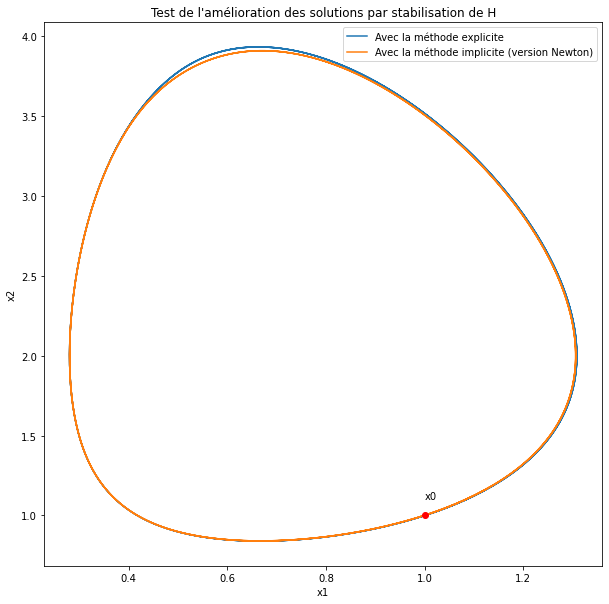

In [53]:
x0 = np.array([1.,1.])
t0 = 0
dt = 0.01
tf = 10

t,x = solve_euler_explicit_stab(f2,x0,dt,t0,tf,10)
t,y = solve_euler_implicit_2_stab(f2,x0,dt,t0,tf,10)
x1,x2 = x[:,0],x[:,1]
y1,y2 = y[:,0],y[:,1]
plt.plot(x1,x2)
plt.plot(y1,y2)
plt.plot(x0[0],x0[1],'ro')
plt.text(x0[0],x0[1]+0.1,'x0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Test de l'amélioration des solutions par stabilisation de H")
legend = ["Avec la méthode explicite","Avec la méthode implicite (version Newton)"]
plt.legend(legend)
plt.show()

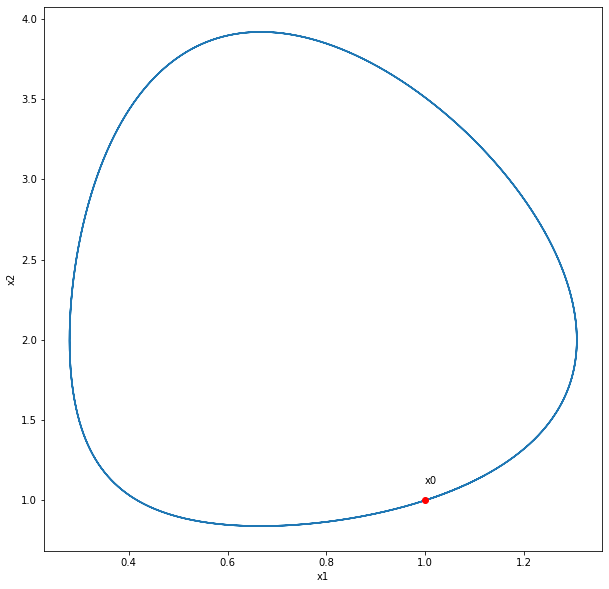

In [63]:
# On teste aussi avec la méthode d'Euler implicite 1

x0 = np.array([1.,1.])
t0 = 0
dt = 0.001
tf = 10

t,x = solve_euler_implicit_stab(f2,x0,dt,t0,tf,2)
x1,x2 = x[:,0],x[:,1]
plt.plot(x1,x2)
plt.plot(x0[0],x0[1],'ro')
plt.text(x0[0],x0[1]+0.1,'x0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

On obtient bien de belles trajectoires fermées, et on est très content!